In [151]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statistics
from scipy.stats import skew
from pandas_profiling import ProfileReport
import sweetviz as sv

In [152]:
#Read the data from the csv file
Shopify_store_data = pd.read_csv('2019_Winter_Data_Science_Intern_Challenge_Data_Set.csv')
ProfileReport(Shopify_store_data)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [153]:
#Check for missing values
Shopify_store_data.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

No missing value was found in the dataset.

In [154]:
#Basic Statistics on the dataset using .describe()
Shopify_store_data.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


From running a .describe() command we are able to see that the mean of the order_amount is 3145.13. We have to conduct further analysis on the data to see if there are other factors that influence the data. We can also see a standard deviation of 41282.54 which is large and definitely tells us that the data is heavily skewed.

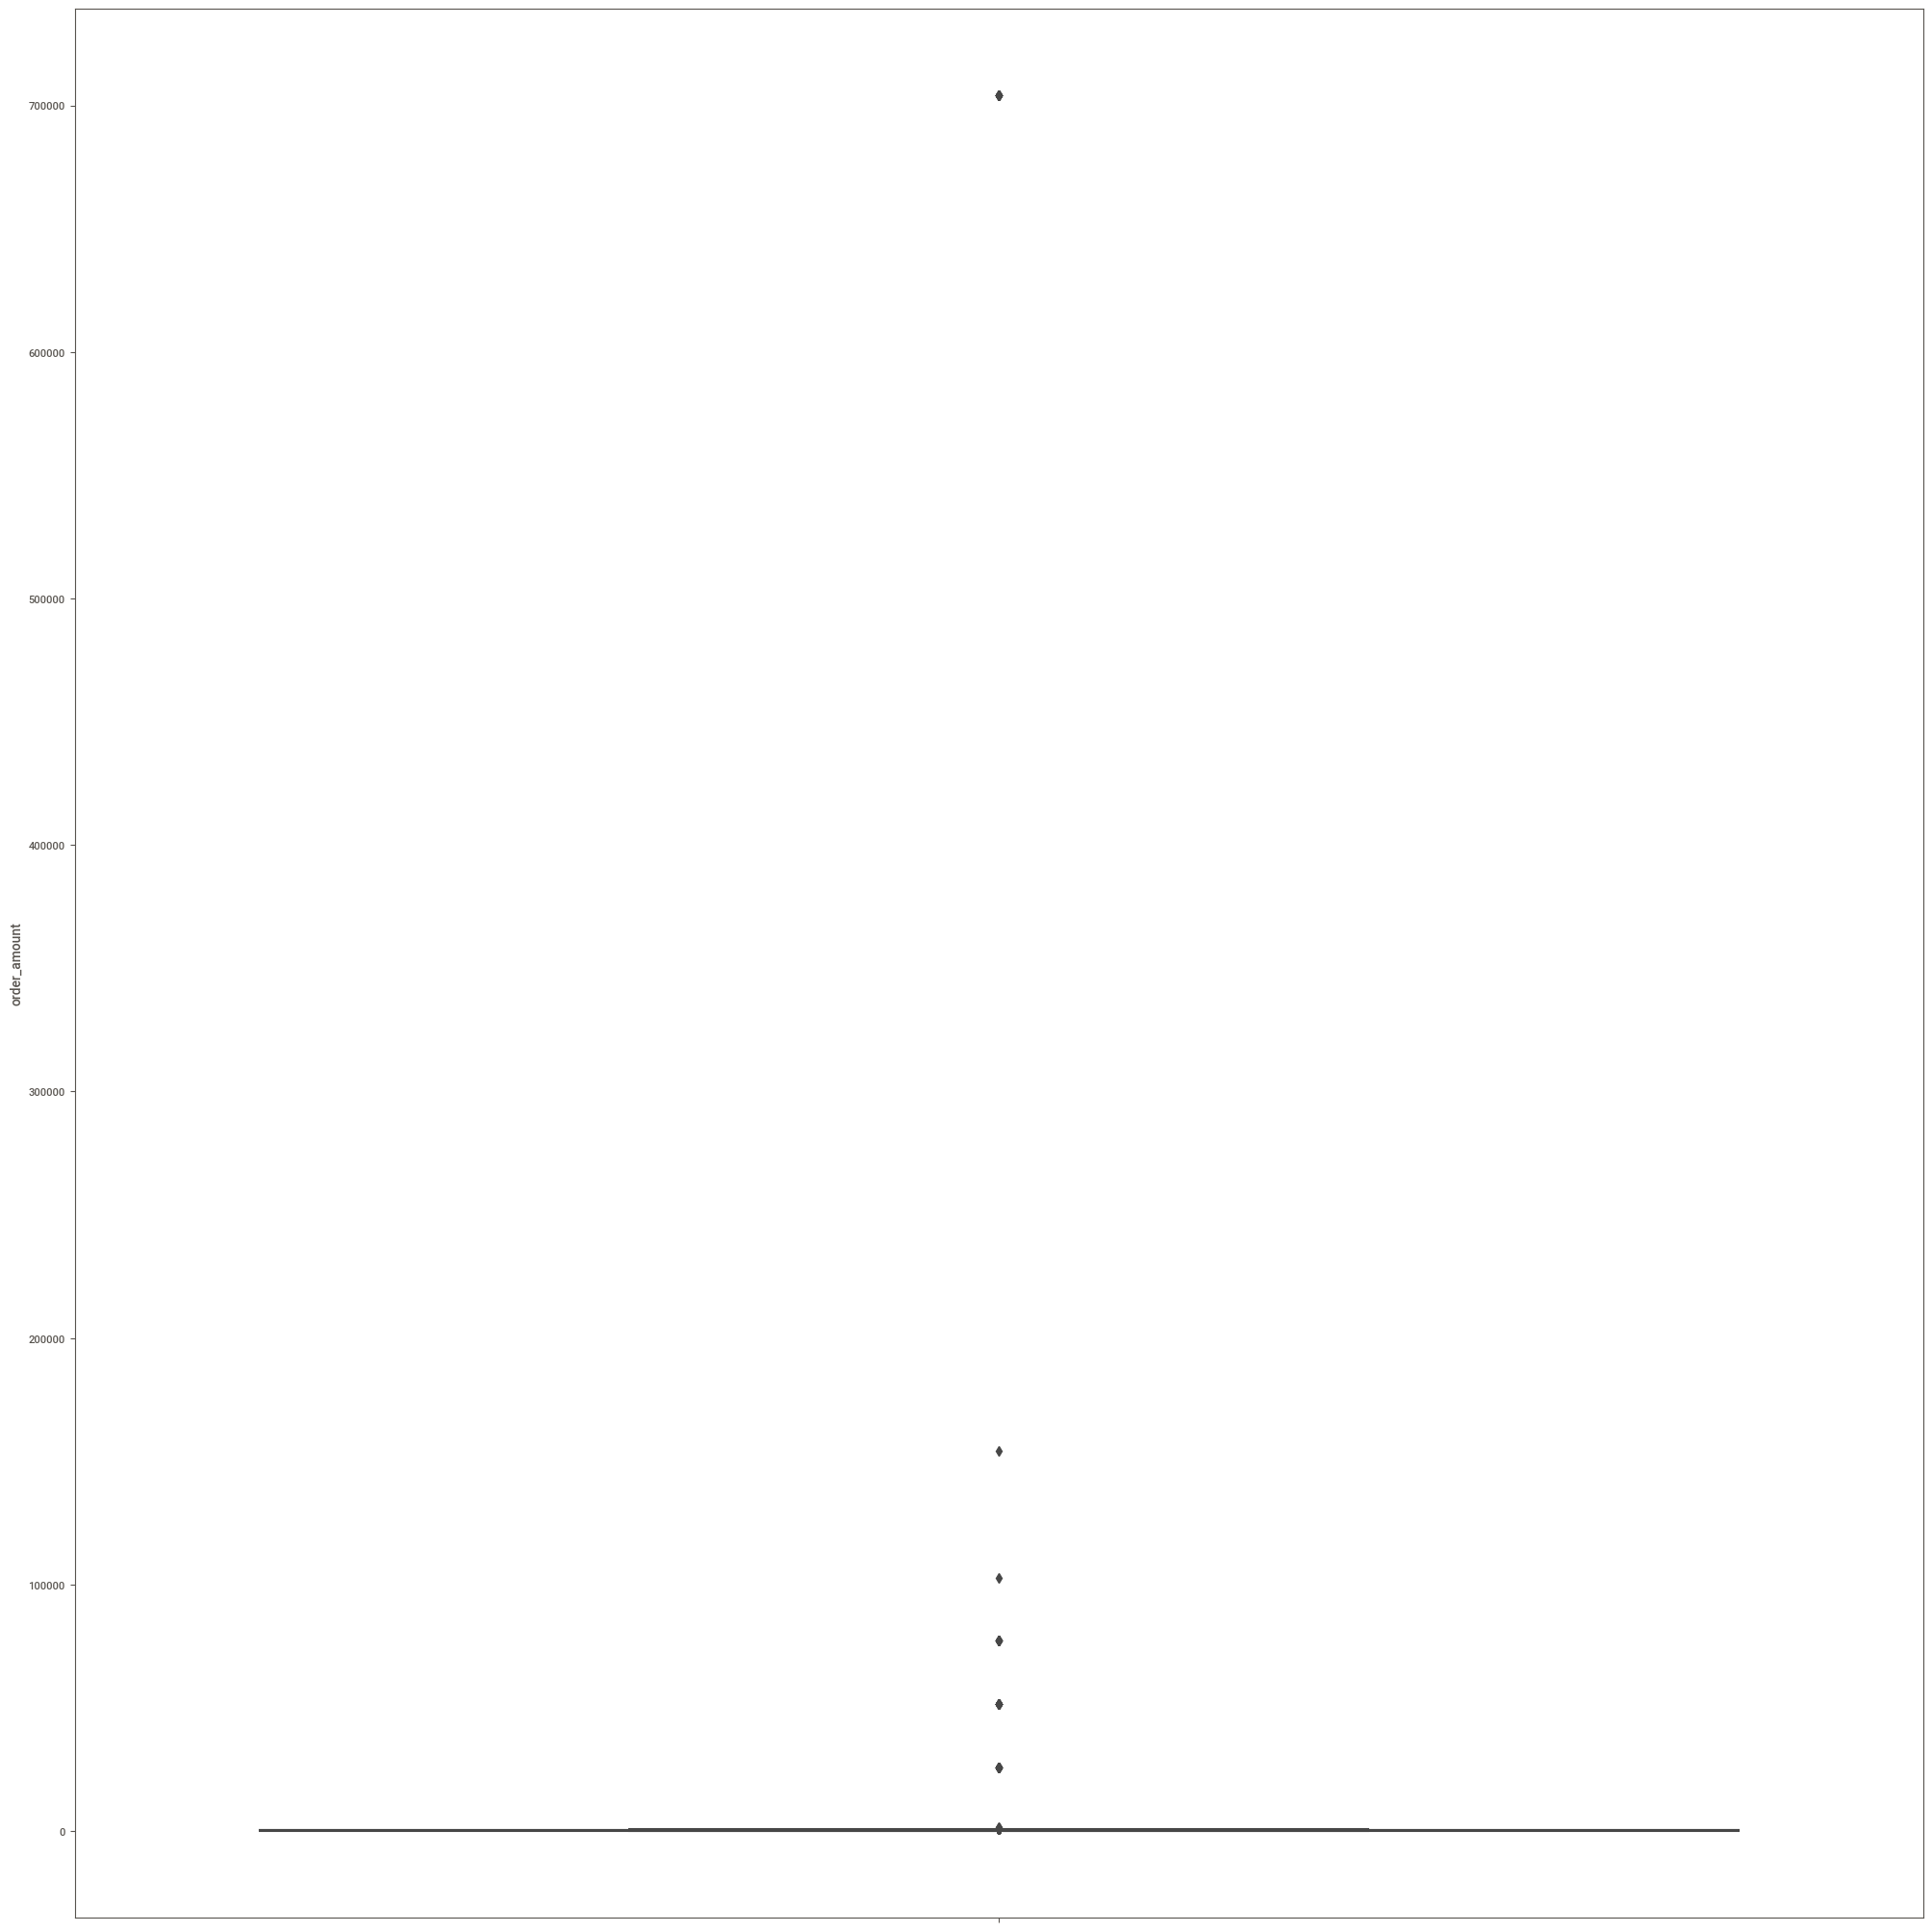

In [155]:
#Boxplot to view the distribution of the data
fig, axs = plt.subplots(figsize=(20, 20))
sns.boxplot(y=Shopify_store_data["order_amount"], data = Shopify_store_data)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

By creating a boxplot of the data we can visualize the data and see that there a couple of outliers that make the data skewed.If the data is heavily skewed then the analysis we do on the data might not be accurate.In an Ideal scenario we would contact the sales team to verify the outliers but for the sake of this challenge we will be cleaning the data i.e removing the outliers

Fom the excel sheet we were able to see that the large orders came from shop Id's (42,78), with shop ID 42 buying 2000 shoes at multiple times during the month. They have similiar spending habits and are heavily skewing the dataset, it would make sense to get rid or replace the outliers in this dataset.

In [156]:
#Delete all non-integer values from the dataset
Shopify_store_data_numeric = Shopify_store_data.copy()
del Shopify_store_data_numeric["payment_method"]
del Shopify_store_data_numeric["created_at"]
Shopify_store_data_numeric

,order_id,shop_id,user_id,order_amount,total_items
0,1,53,746,224,2
1,2,92,925,90,1
2,3,44,861,144,1
3,4,18,935,156,1
4,5,18,883,156,1
...,...,...,...,...,...
4995,4996,73,993,330,2
4996,4997,48,789,234,2
4997,4998,56,867,351,3
4998,4999,60,825,354,2


In [157]:
#Get Percentage and number of outliers in the dataset
for k,v in Shopify_store_data_numeric.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(Shopify_store_data_numeric)[0]
    num_outliers = perc/100 * 5000 # Percentage multiplied by total number of rows
    print("%s: Percentage of Outliers = %.2f%% and Number of outliers is = %d" % (k, perc, num_outliers))

order_id: Percentage of Outliers = 0.00% and Number of outliers is = 0
shop_id: Percentage of Outliers = 0.00% and Number of outliers is = 0
user_id: Percentage of Outliers = 0.00% and Number of outliers is = 0
order_amount: Percentage of Outliers = 2.82% and Number of outliers is = 141
total_items: Percentage of Outliers = 0.54% and Number of outliers is = 27


In [158]:
## Find the Lower bound value and the higher bound values to detect outliers
lower_bound_val = Shopify_store_data_numeric.order_amount.quantile(0.25) - 1.5 * (Shopify_store_data_numeric.order_amount.quantile(0.75) - Shopify_store_data_numeric.order_amount.quantile(0.25))
upper_bound_val = Shopify_store_data_numeric.order_amount.quantile(0.75) - 1.5 * (Shopify_store_data_numeric.order_amount.quantile(0.25) - Shopify_store_data_numeric.order_amount.quantile(0.75))
print (lower_bound_val,upper_bound_val)


-177.5 730.5


In [159]:
#Delete Outliers Using Upper and Lower Bound Values
Clean_Store_Data = Shopify_store_data_numeric[(Shopify_store_data.order_amount < upper_bound_val) & (Shopify_store_data.order_amount > lower_bound_val)]
Clean_Store_Data.describe()


,order_id,shop_id,user_id,order_amount,total_items
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,2497.395966,49.852645,849.905742,293.715374,1.950196
std,1443.356555,29.049171,86.887496,144.453395,0.919791
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1244.500000,24.000000,776.000000,162.000000,1.000000
50%,2498.000000,50.000000,850.000000,280.000000,2.000000
75%,3749.500000,74.000000,925.000000,380.000000,3.000000
max,5000.000000,100.000000,999.000000,730.000000,5.000000


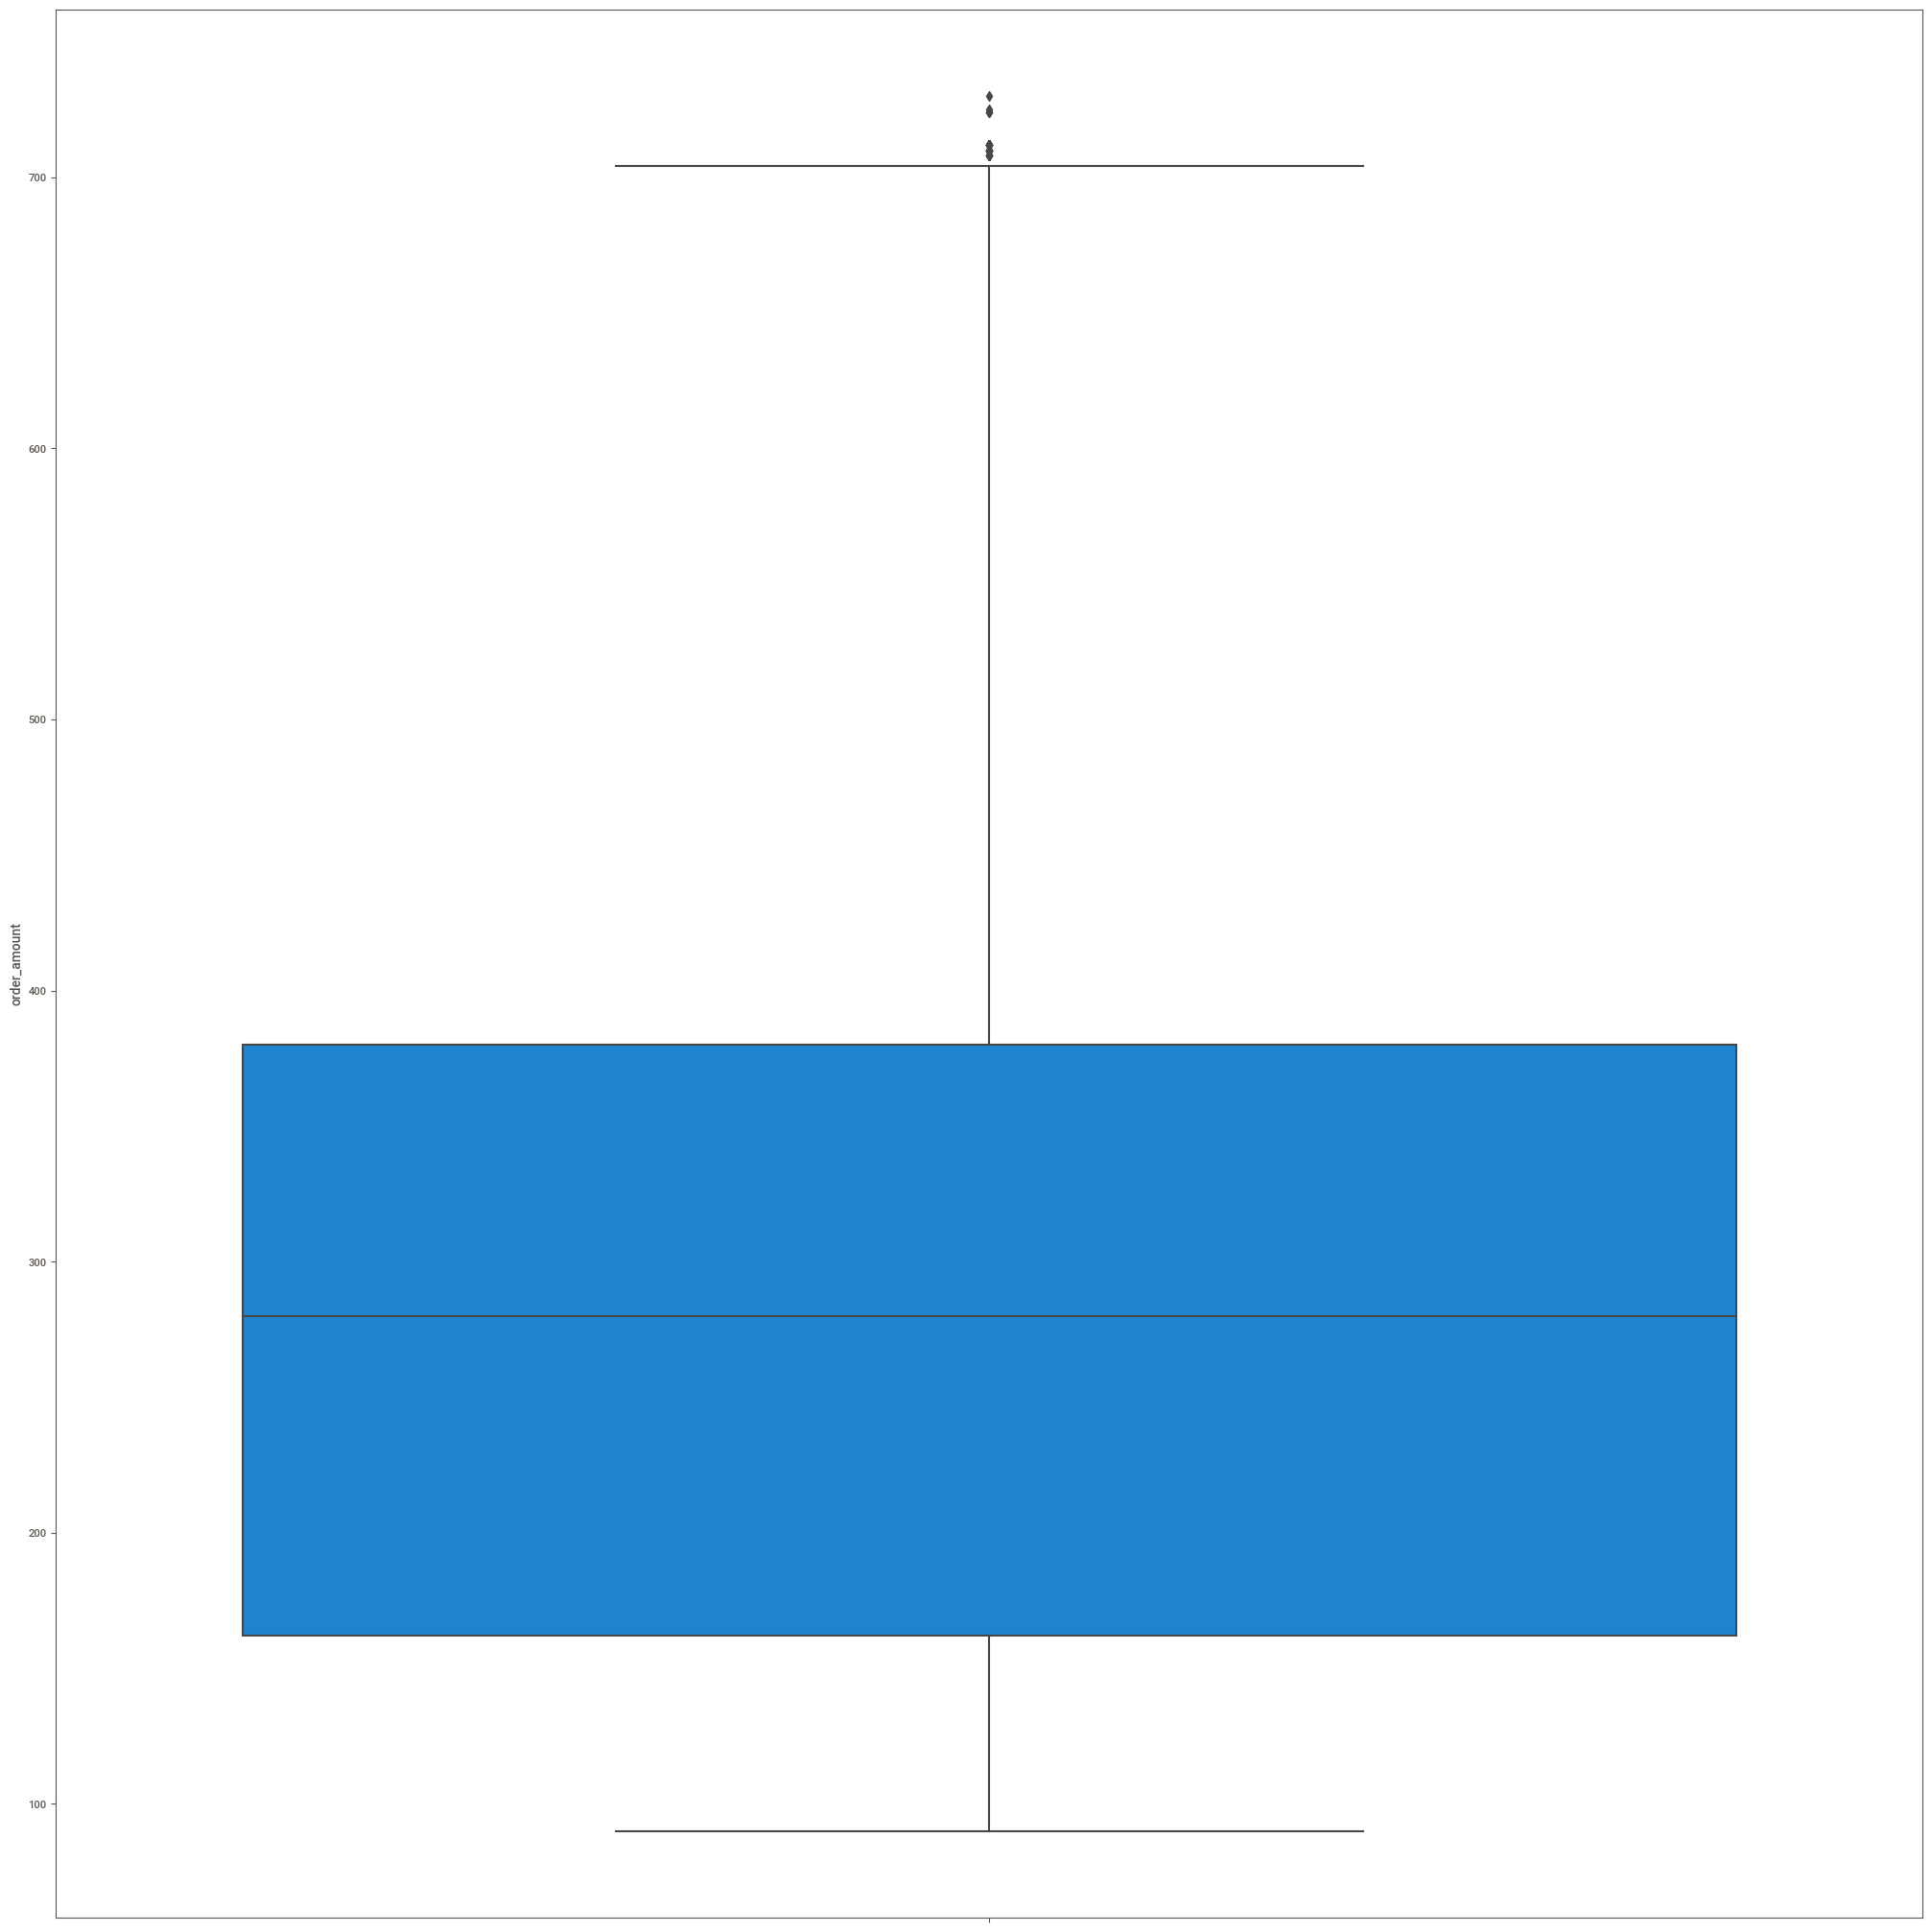

In [160]:
#boxplot to view the distribution of the data
fig, axs = plt.subplots(figsize=(20, 20))
sns.boxplot(y=Clean_Store_Data["order_amount"], data = Clean_Store_Data)
plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=3.0)
plt.show()

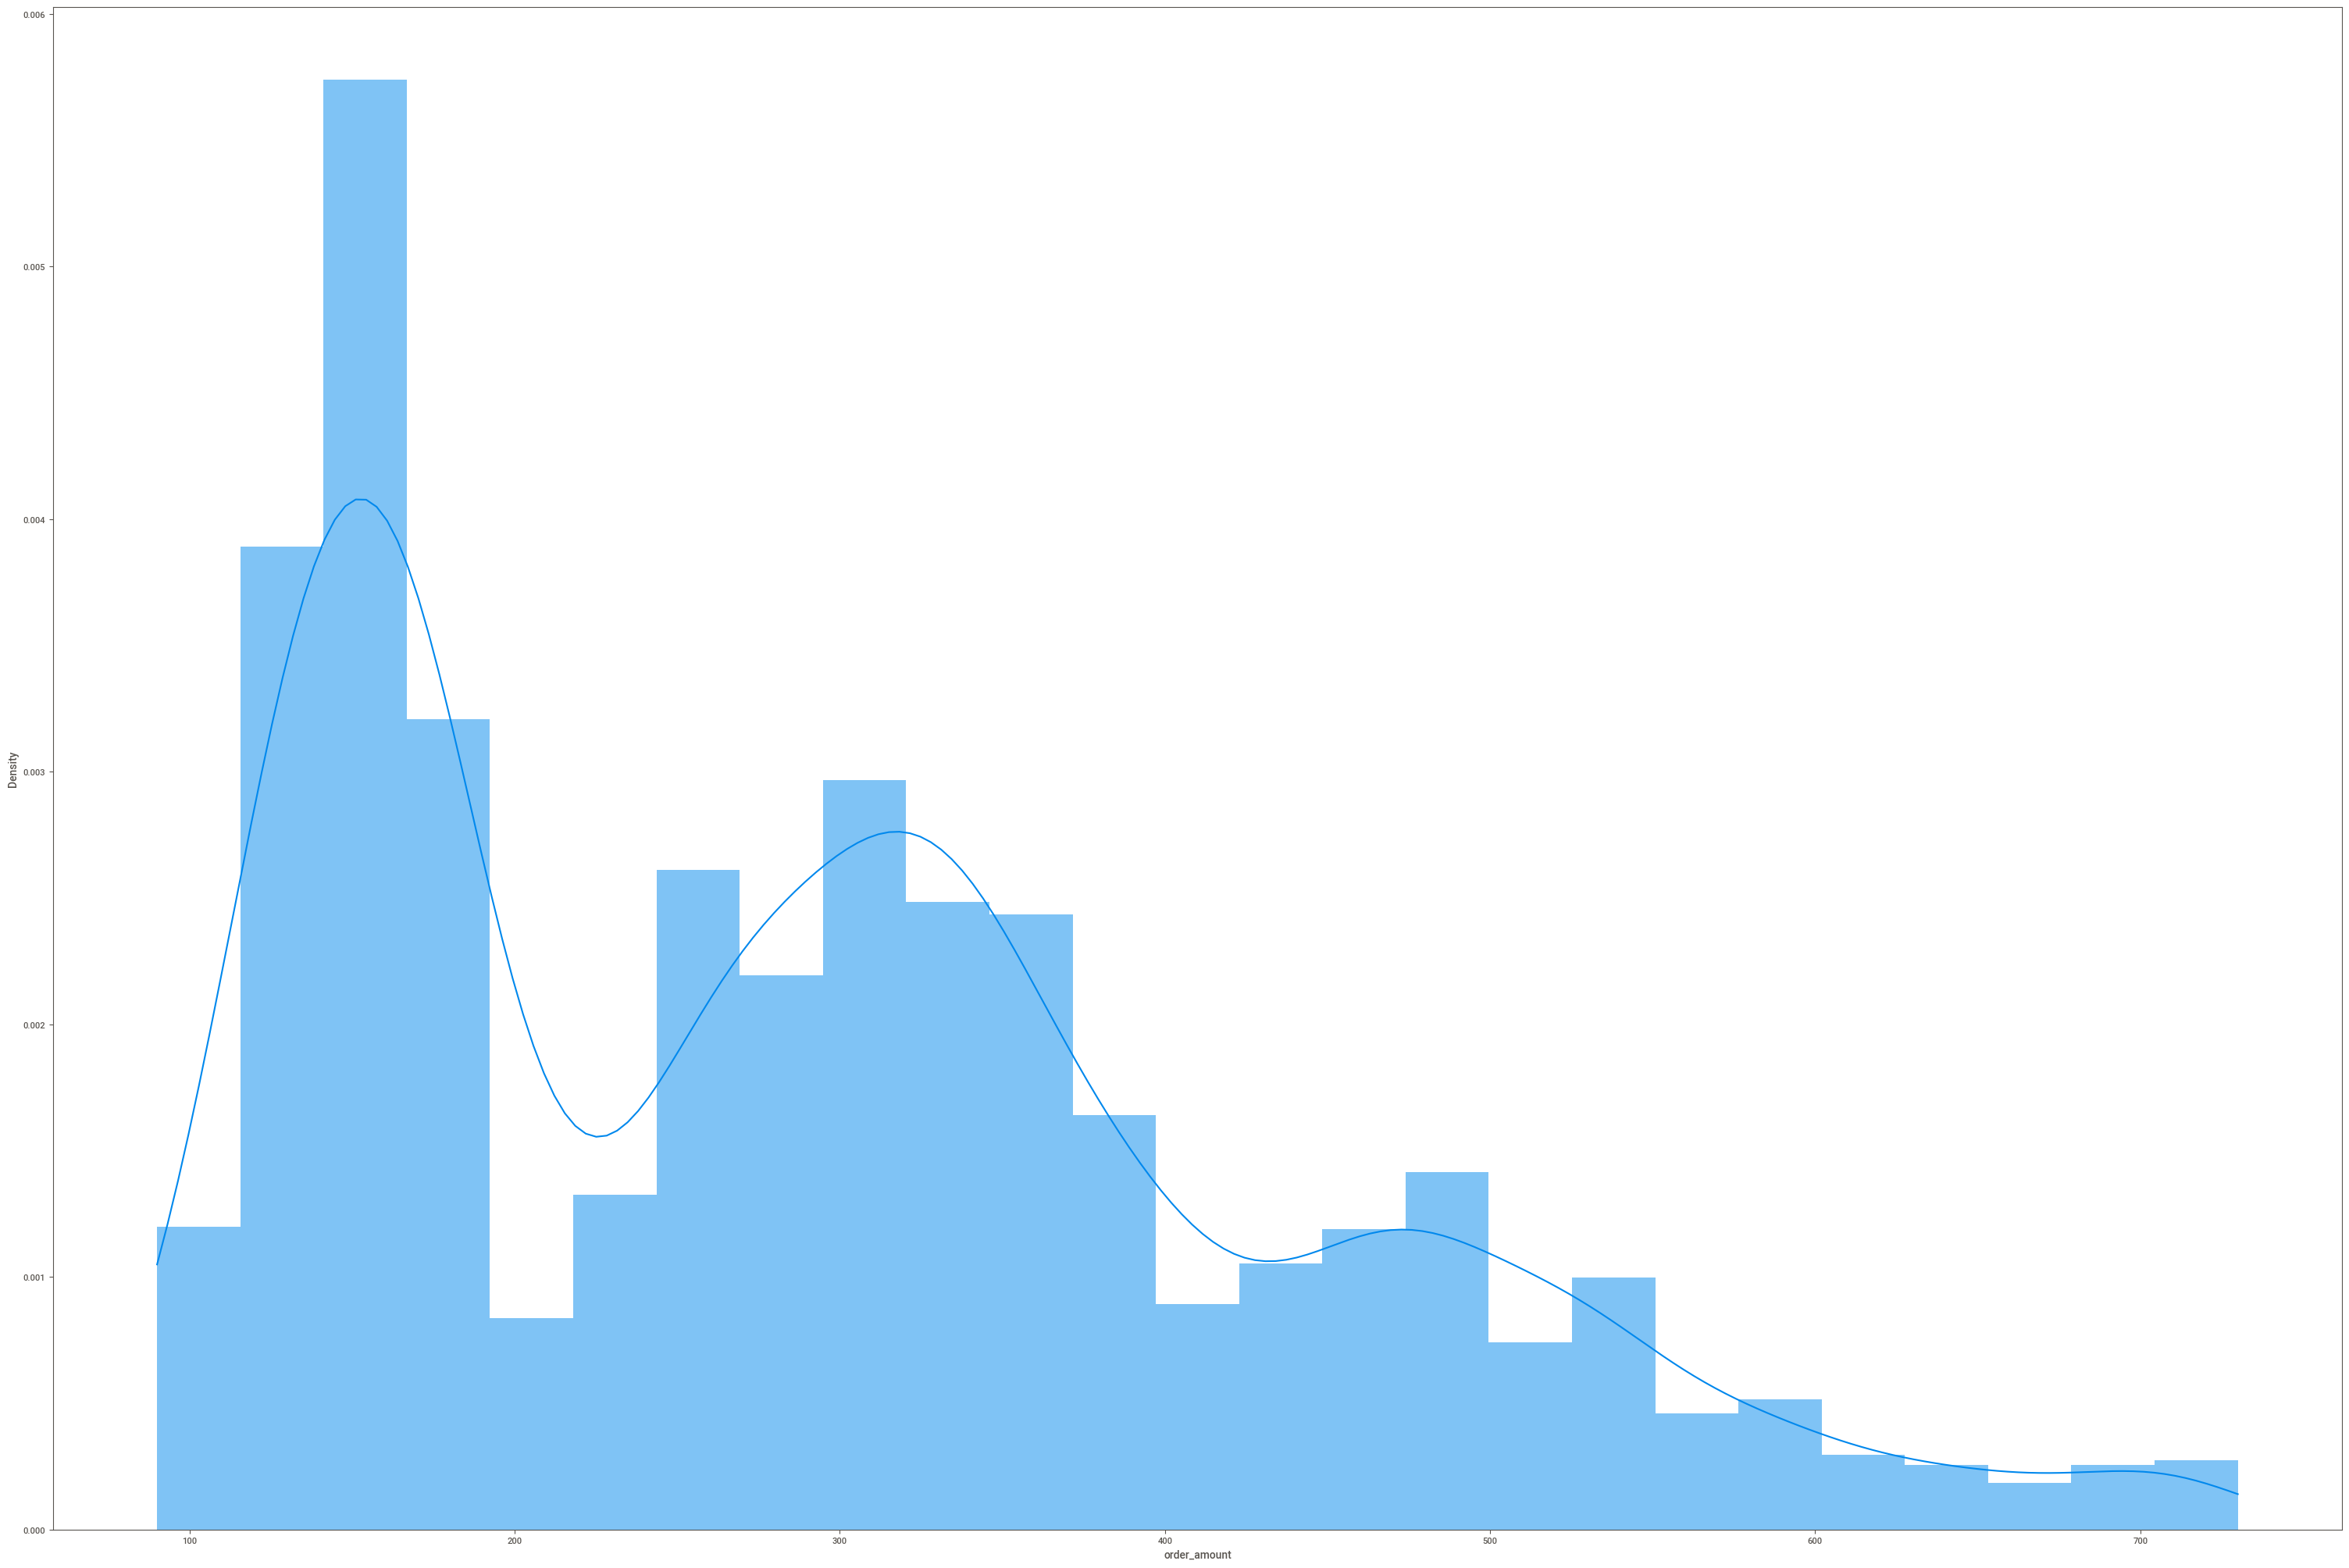

In [163]:
#Histogram to view the distribution of the data
fig, axs = plt.subplots(figsize=(30, 20))
sns.histplot(x=Clean_Store_Data["order_amount"], data = Clean_Store_Data, kde = True, stat = "density", linewidth=0)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [162]:
Clean_Store_Data.order_amount.describe()
median = float(Clean_Store_Data['order_amount'].median())
print(median)

280.0


b)What metric would you report for this dataset?




I would use the median to report this dataset because for skewed or outlier-filled distributions, the median is the most useful metric of central tendency. Extreme outliers or non-symmetric distributions of scores have no effect on the median because it only uses one or two values. In skewed distributions, however, the mean and mode might fluctuate.

c) What is this Value?




The MOV for the Original Dataset is 284.00.  
    

The AOV for the Original Dataset is 3,145.13.


The AOV without the outliers is 293.72 which is a significant improvement over the original dataset.
    

The MOV without the outliers is 280.00, I would use this value to report the dataset.